# Logistic Regression

Use [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). Attempt to predict whether or not a passenger survived based off of their featuers

In [1]:
#输出多个output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
#Open hinterland
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use("ggplot")

## Data Description

In [4]:
train = pd.read_csv("titanic.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Data Visualization

<AxesSubplot:>

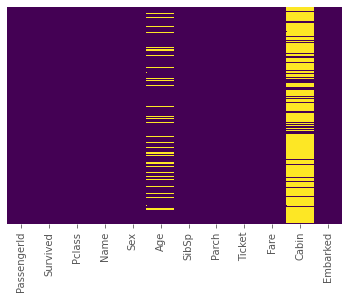

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

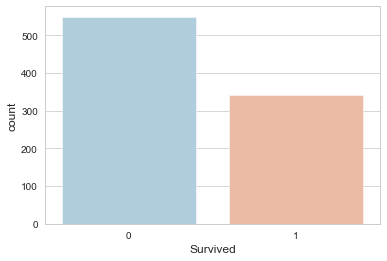

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r');

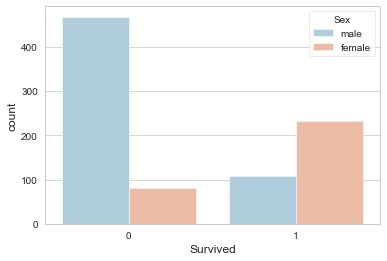

In [10]:
sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r");

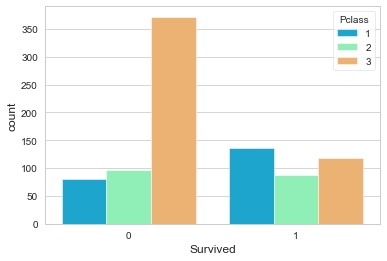

In [11]:
sns.countplot(x="Survived", data=train, hue="Pclass", palette="rainbow");

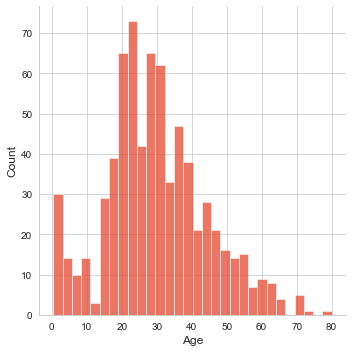

In [12]:
sns.displot(train["Age"].dropna(), kde=False, bins=30);

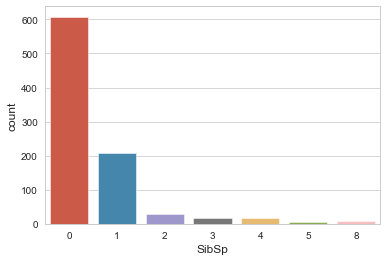

In [13]:
sns.countplot(x='SibSp',data=train);

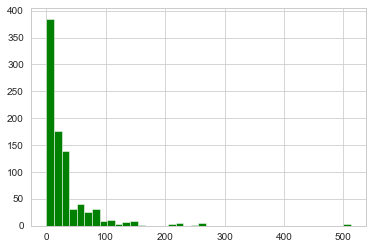

In [14]:
train["Fare"].hist(color="green", bins=40);

## Data Cleaning

In [15]:
train.head()
train["Embarked"].value_counts()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


S    644
C    168
Q     77
Name: Embarked, dtype: int64

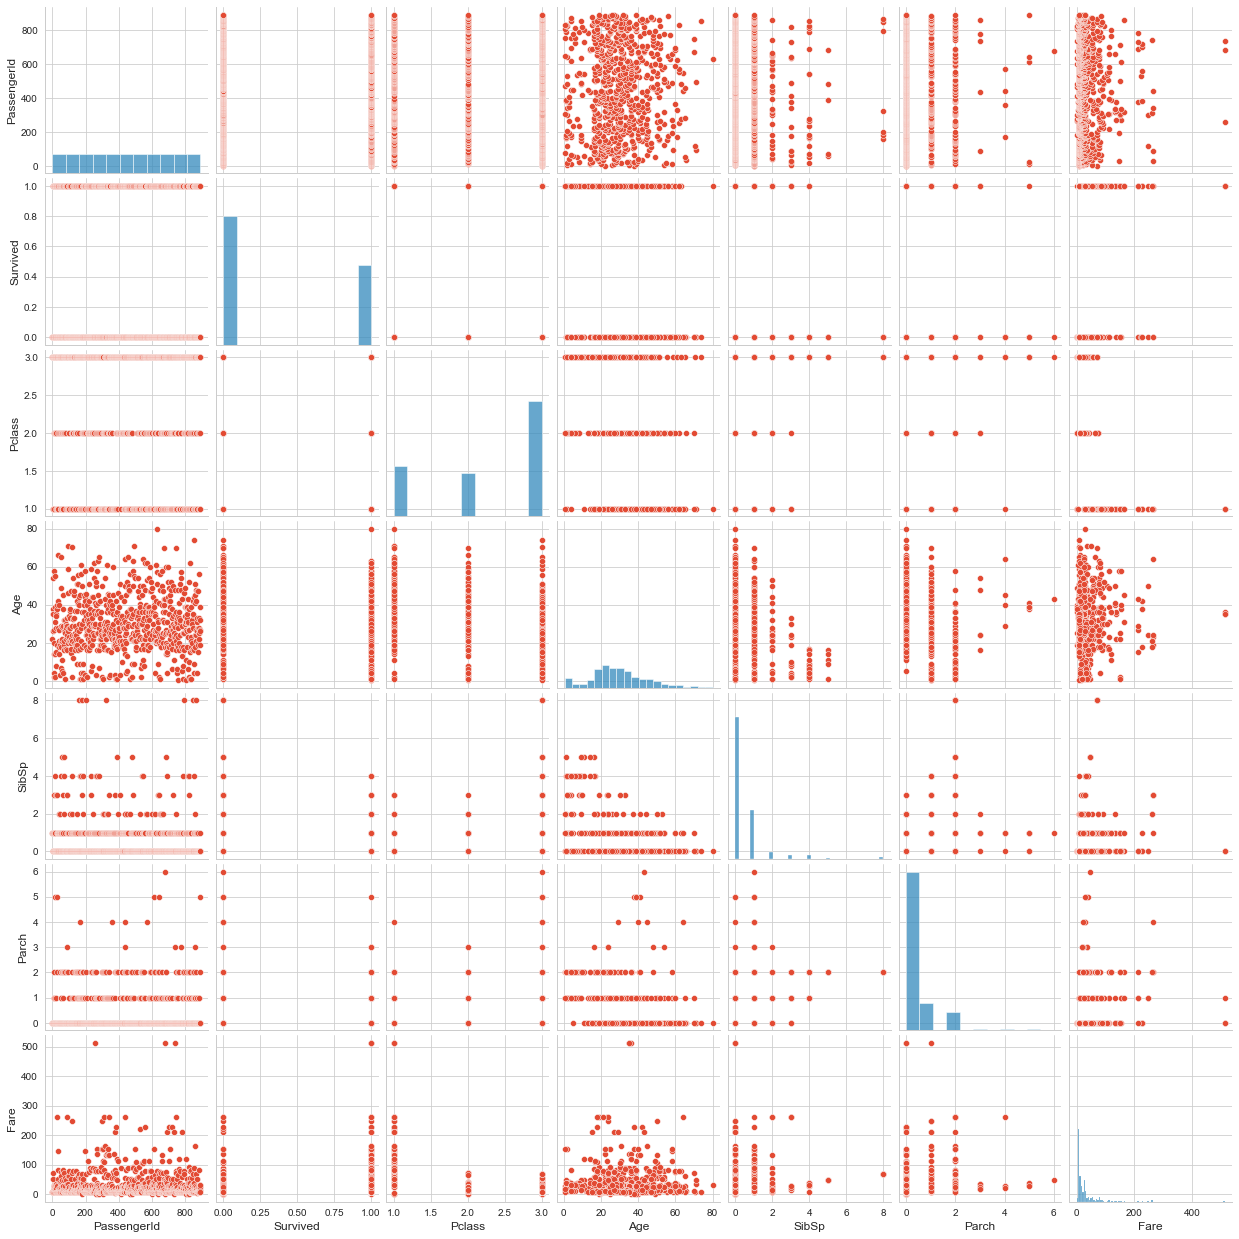

In [16]:
sns.pairplot(train)

**From the plot, besides Sex and Embarked, we should also treat Pclass as categorical variable**

In [17]:
train = train[["Survived","Pclass","Sex","Embarked","Age","SibSp","Parch","Fare"]]
train.head()
train["Embarked"].value_counts()

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,3,male,S,22.0,1,0,7.2500
1,1,1,female,C,38.0,1,0,71.2833
2,1,3,female,S,26.0,0,0,7.9250
3,1,1,female,S,35.0,1,0,53.1000
4,0,3,male,S,35.0,0,0,8.0500


S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Encode Categorical Features

In [18]:
Pclass = pd.get_dummies(train["Pclass"], drop_first=True)
Pclass.columns = ["Plcass_2","Pclass_3"]

sex = pd.get_dummies(train["Sex"], drop_first=True)

embark = pd.get_dummies(train["Embarked"], drop_first=True)
embark.columns = ["Embarked_Q", "Embarked_S"]

In [19]:
train = pd.concat([train, Pclass, sex, embark], axis=1)

In [20]:
train.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [21]:
train

,Survived,Age,SibSp,Parch,Fare,Plcass_2,Pclass_3,male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,NaN,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


### Dealing with the missing value

We want to fill in missing age data instead of just dropping the missing age data rows

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy="mean")
imputer = imputer.fit(train["Age"].values.reshape(-1,1))
train["Age"] = imputer.transform(train["Age"].values.reshape(-1,1))

### Split the Dataset

In [23]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Plcass_2', 'Pclass_3',
       'male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [25]:
X = train[['Age', 'SibSp', 'Parch', 'Fare', 'Plcass_2',
       'Pclass_3', 'male', 'Embarked_Q', 'Embarked_S']]
y = train["Survived"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train

,Age,SibSp,Parch,Fare,Plcass_2,Pclass_3,male,Embarked_Q,Embarked_S
520,30.000000,0,0,93.5000,0,0,0,0,1
510,29.000000,0,0,7.7500,0,1,1,1,0
446,13.000000,0,1,19.5000,1,0,0,0,1
2,26.000000,0,0,7.9250,0,1,0,0,1
691,4.000000,0,1,13.4167,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
575,19.000000,0,0,14.5000,0,1,1,0,1
838,32.000000,0,0,56.4958,0,1,1,0,1
337,41.000000,0,0,134.5000,0,0,0,0,0
523,44.000000,0,1,57.9792,0,0,0,0,0


### Feature Scaling

In [28]:
X_train = X_train.values
X_test = X_test.values

In [29]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train[:,[0,3]] = scale_X.fit_transform(X_train[:,[0,3]])
X_test[:,[0,3]] = scale_X.transform(X_test[:,[0,3]])

## Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

LogisticRegression()

In [32]:
predictions = logit.predict(X_test)

### Evaluation

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

